In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# training data generation
m = 100
x1 = 8*np.random.rand(m, 1)     # 0 ~ 8 까지 100개의 random한 colunmn
x2 = 7*np.random.rand(m, 1) - 4 # -4 ~ 3 까지 100개의 random한 colunmn
 
# x1, x2 generation 된 상태 -> given parameter    
    
g0 = 0.8*x1 + x2 - 3    # x1, x2 plane에서 x2 = -0.8x1 + 3 + g0 
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)  # 조건에 해당하는 성분들의 row, col의 number 로 행렬화 
C2 = np.where(g2 < 0)

In [3]:
C1 = np.where(g1 >= 0)[0]      # 조건에 해당한 row number들의 행렬로  
C2 = np.where(g2 < 0)[0]  

print(C1.shape)
print(C2.shape)

(32,)
(39,)


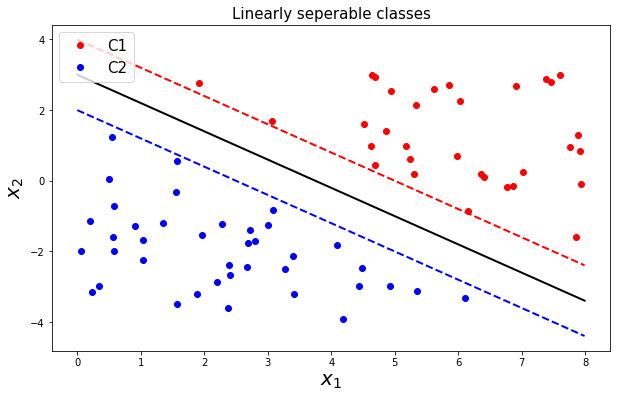

In [4]:
xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = -0.8*xp + 3 
yp1 = -0.8*xp + 4
yp2 = -0.8*xp + 2

plt.figure(figsize=(10, 6))
# plt.plot(x1, x2, 'ko')
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, yp, 'k', linewidth=2)
plt.plot(xp, yp1, 'r--', linewidth=2)
plt.plot(xp, yp2, 'b--', linewidth=2)
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()

In [5]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([C2.shape[0],1]), x1[C2], x2[C2]])
X = np.vstack([X1, X2])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C2.shape[0],1])])
              
X = np.asmatrix(X)
y = np.asmatrix(y)

In [8]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]    # data수만큼 iteration
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T
            
print(w)

[[-17.        ]
 [  5.14986208]
 [  9.43756968]]


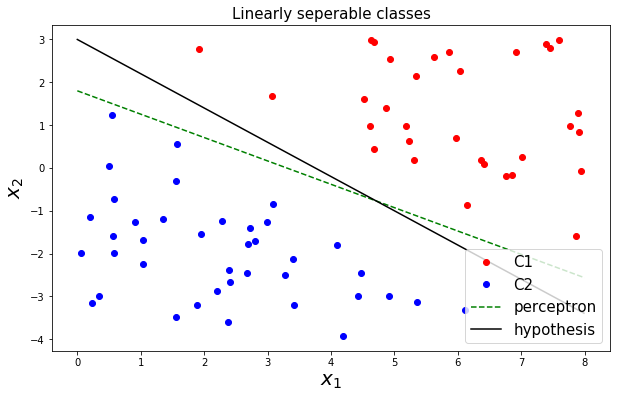

In [14]:
x1p = np.linspace(0, 8, 100).reshape(-1, 1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]
xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = -0.8*xp + 3 

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(x1p, x2p, 'g--', label='perceptron')
plt.plot(xp, yp, 'k', label='hypothesis')
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()